🔹 Time-Domain Features (Aggregated):
Mean: -0.8850
Standard Deviation: 0.3776
Skewness: -0.2482
Kurtosis: 11.1901

🔹 Frequency-Domain Features (Aggregated):
Peak Frequency: 0.0000 Hz


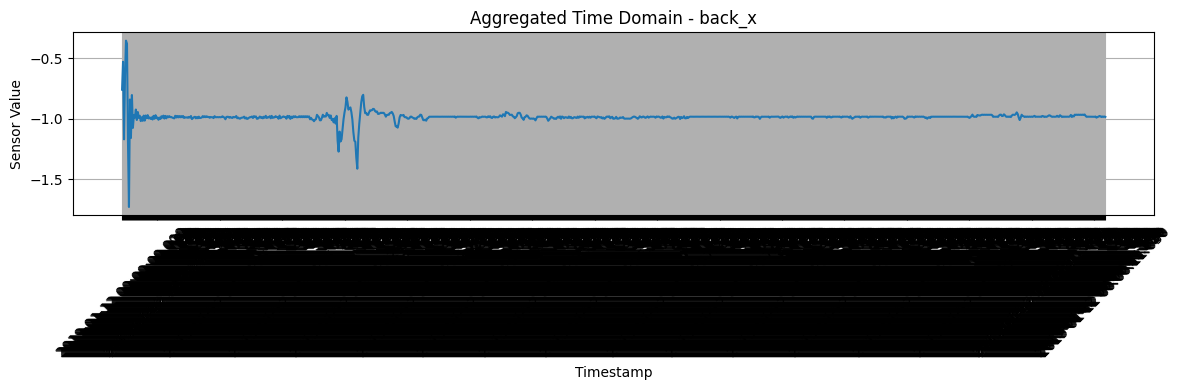

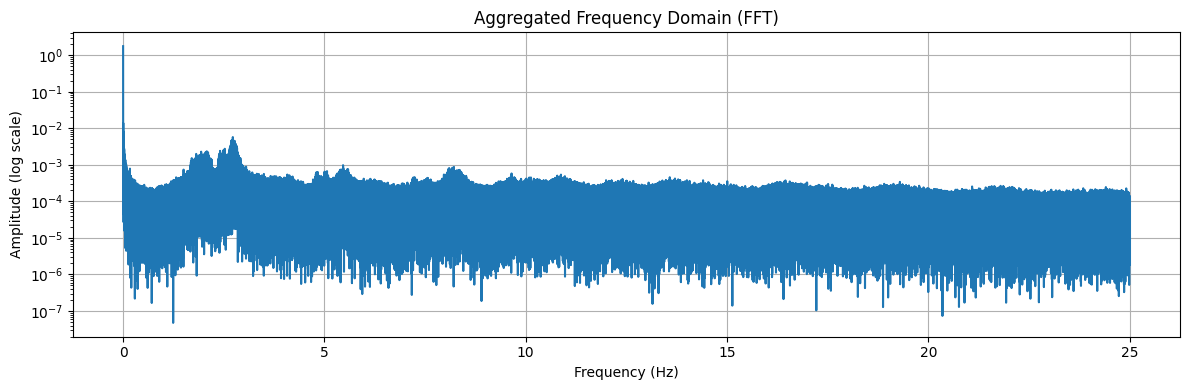

In [ ]:
import pandas as pd
import numpy as np
import os
from scipy.stats import skew, kurtosis
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configuration
folder_path = "./harth"
sensor_column = 'back_x'
sampling_interval = 0.02  # 50Hz

# Aggregated data storage
all_sensor_values = []
all_timestamps = []

# Loop through all CSV files in folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path)

            # Check for required columns
            if sensor_column not in df.columns or 'timestamp' not in df.columns:
                print(f"⚠️ Skipping {filename}: missing '{sensor_column}' or 'timestamp'.")
                continue

            # Convert timestamps to datetime
            timestamps = pd.to_datetime(df['timestamp'], errors='coerce')
            sensor_data = df[sensor_column]

            # Drop rows with invalid timestamps or sensor values
            valid = timestamps.notna() & sensor_data.notna()
            timestamps = timestamps[valid].to_numpy()
            sensor_data = sensor_data[valid].to_numpy()

            if len(sensor_data) < 2:
                print(f"⚠️ Skipping {filename}: not enough valid data.")
                continue

            all_sensor_values.extend(sensor_data)
            all_timestamps.extend(timestamps)

        except Exception as e:
            print(f"⚠️ Error processing {filename}: {e}")

# Convert lists to arrays
all_sensor_values = np.array(all_sensor_values)
all_timestamps = np.array(all_timestamps)

# Time-domain features
mean_val = np.mean(all_sensor_values)
std_val = np.std(all_sensor_values)
skew_val = skew(all_sensor_values)
kurt_val = kurtosis(all_sensor_values)

print("🔹 Time-Domain Features (Aggregated):")
print(f"Mean: {mean_val:.4f}")
print(f"Standard Deviation: {std_val:.4f}")
print(f"Skewness: {skew_val:.4f}")
print(f"Kurtosis: {kurt_val:.4f}")

# Frequency-domain features
N = len(all_sensor_values)
yf = fft(all_sensor_values)
xf = fftfreq(N, sampling_interval)[:N // 2]
amplitudes = 2.0 / N * np.abs(yf[0:N // 2])
peak_freq = xf[np.argmax(amplitudes)]

print("\n🔹 Frequency-Domain Features (Aggregated):")
print(f"Peak Frequency: {peak_freq:.4f} Hz")

# Plot Time Domain with cleaned timestamps
plt.figure(figsize=(12, 4))
plt.plot(all_timestamps[:1000], all_sensor_values[:1000])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # HH:MM:SS format
plt.xticks(rotation=45)
plt.title(f"Aggregated Time Domain - {sensor_column}")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Frequency Domain
plt.figure(figsize=(12, 4))
plt.plot(xf, amplitudes)
plt.yscale('log')
plt.title("Aggregated Frequency Domain (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()
